<a href="https://colab.research.google.com/github/VishalShah1999/Visulization_ML/blob/main/vs2530_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5
The main goal of this homework is to use what we have learned from white-box models to understand a black-box model's behavior.

We are still going to use the loan application dataset as in the practice 2. Find it here: https://drive.google.com/file/d/186LjbAZoMat91ByH7aJGJ8PnfO2LqKlu/view?usp=sharing

Don't forget to specify the filepath on your own Google Drive below.


You will need to finish the following subtasks:
- (1) Train a surrogate tree-based model to understand the model prediction behaviors of the provided SVM model. 
- (2) Answer a few questions based on the interpretation of the surrogate model.


In [1]:
import numpy as np
import pandas as pd
from sklearn import svm

In the column of "Outcome",
- 0 represents "will not default",
- 1 represents "will default".

In [2]:
df = pd.read_csv(filepath_or_buffer="cleaned_fico_data.csv",)
df

,Outcome,External Risk Estimate,Months Since Oldest Trade Open,Months Since Last Trade Open,Average Months in File,Satisfactory Trades,Trades 60+ Ever,Trades 90+ Ever,Bills Paid on Time,Months Since Last Delq.,Max Delq. Last 12M,Max Delq. Ever,Total Trades,Trades Open Last 12M,% Installment Trades,Months Since Most Recent Inq,Inq Last 6 Months,Inq Last 6 Months exl. 7 days,Unpaid Balance,Installment Burden,Revolving Trades w/ Balance,Installment Trades w/ Balance,Bank Trades w/ High Utilization Ratio,% Trades w/ Balance
0,0,55,144,4,84,20,3,0,83,2,5,5,23,1,43,0,0,0,33,77,8,1,1,69
1,0,61,58,15,41,2,4,4,100,150,2,7,7,0,67,0,0,0,0,57,0,2,0,0
2,0,67,66,5,24,9,0,0,100,150,7,7,9,4,44,0,4,4,53,66,4,2,1,86
3,0,66,169,1,73,28,1,1,93,76,1,6,30,3,57,0,5,4,72,83,6,4,3,91
4,0,81,333,27,132,12,0,0,100,150,7,7,12,0,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,1,73,131,5,57,21,0,0,95,80,1,6,21,5,19,7,0,0,26,81,5,2,0,100
9867,0,65,147,39,68,11,0,0,92,28,1,6,12,0,42,1,1,1,86,53,2,2,1,80
9868,0,74,129,6,64,18,1,1,100,150,1,7,18,1,33,3,4,4,6,53,5,3,0,56
9869,0,72,234,12,113,42,2,2,96,35,1,2,45,0,20,6,0,0,19,47,4,1,0,38


In [3]:
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
'''train a decision tree model'''
clf = svm.SVC(kernel="linear", C=0.001, probability=True)
clf.fit(X_train, y_train)

SVC(C=0.001, kernel='linear', probability=True)

In [6]:
print("training accuracy:", clf.score(X_train, y_train))
print("testing accuracy:", clf.score(X_test, y_test))

training accuracy: 0.7310030395136778
testing accuracy: 0.7281012658227848


## Please train a surrogate model to approximate the original model's behavior on the **test set**?

How can we do that?

We can use the original model input (`X_test`), and the model output (but not the labels/ground truth) to train an interpretable surrogate model, for example, a decision tree, or a rule set.


Please include your surrogate model training code below. You can add or remove any code blocks.

In [7]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, y_train)

In [8]:
tree_model.score(X_train, y_train)

1.0

In [9]:
tree_model.score(X_test, y_test)

0.6339240506329114

## Question Answering
Please answer the following questions based on the surrogate model you have trained.  

(1) What features are important when the original model makes predictions? List the top 5 features that yout think are mostly important. 

(2) Please explain why you choose the parameters you used to train the surrogate tree.

(3) When a person is predicted as "will default" in the future, what may the loan application look like? Describe the application using no more than 3 features. And what's your reason for this description?

(4) Imagine that you are going to deploy this SVM model for the actual business department, please list 3 questions about this SVM model's behavior that you want to know before the actual deployment, and whether they can be answered by the surrogate tree. 
(Notice: This question is not to judege how well you can do something, just to help you understand the role of model interpretation in the whole pipeline. So you can just list whatever you want to talk about.)




======== You can run some code and answer the questions based on what you see from the result ========

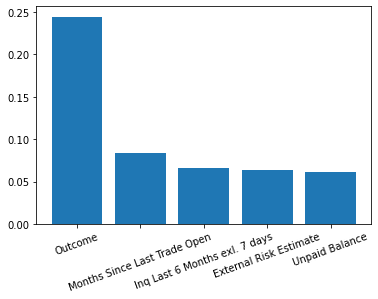

In [32]:
from matplotlib import pyplot
name1 = []
importance1 = []
# summarize feature importance
for importance, name in sorted(zip(tree_model.feature_importances_, df.columns),reverse=True)[:5]:
    name1.append(name)
    importance1.append(importance)
# plot feature importance
pyplot.bar(name1, importance1)
pyplot.xticks(rotation = 20)
pyplot.show()